In [7]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 15.9 MB/s eta 0:00:00


#TUGAS 1



*   Jelaskan pengaruh level noise terhadap:
  *   Bentuk sinyal dalam domain waktu
  *   Spektrum frekuensi yang dihasilkan
*   Pada level noise berapa sinyal asli (10 Hz) masih dapat diidentifikasi dengan jelas?
*   Bandingkan waktu komputasi antara DFT dan FFT untuk sinyal ini





In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter
from scipy.signal import firwin, filtfilt
import neurokit2 as nk

In [13]:
# Fungsi untuk menghitung FFT menggunakan scipy
def calculate_scipy_fft(signal, fs):
    from scipy.fft import fft, fftfreq
    N = len(signal)
    fft_result = fft(signal)
    freq = fftfreq(N, d=1/fs)
    return freq, fft_result

In [14]:
# Fungsi untuk menghitung DFT secara manual
def calculate_dft(signal):
    N = len(signal)
    dft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_result

In [15]:
#Membuat sinyal sederhana
fs = 1000
t = np.linspace(0, 2, 2 * fs)
f1 = 10
signal = np.sin(2 * np.pi * f1 * t)

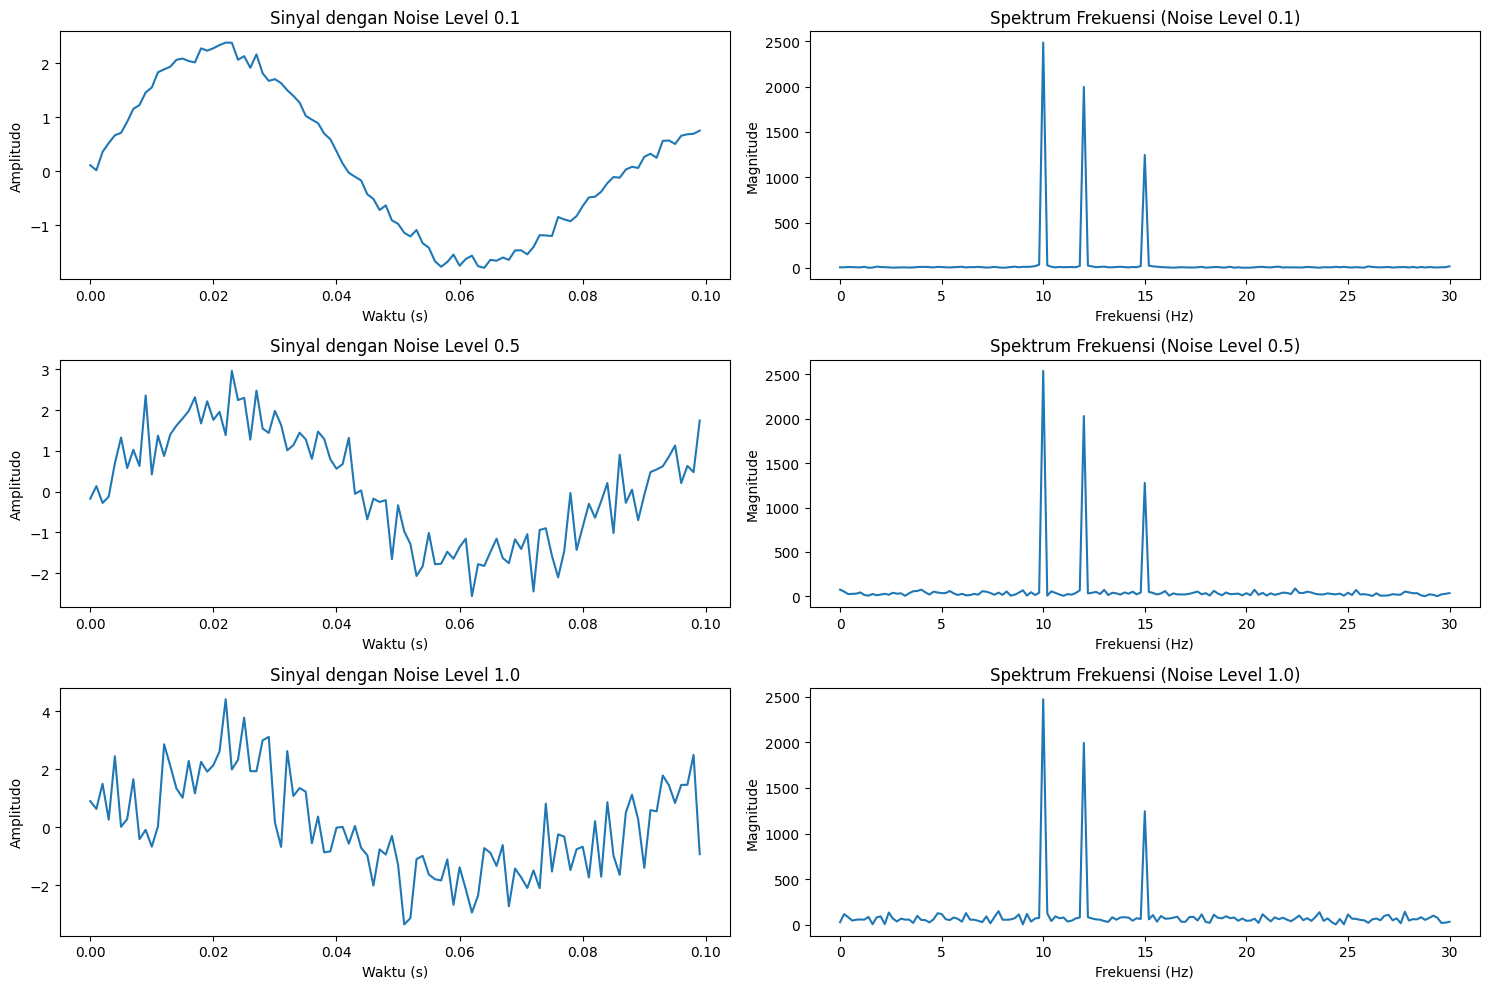

Waktu komputasi FFT: 0.001432 detik
Waktu komputasi DFT: 53.925415 detik


In [32]:
#Menambahkan noise dengan level-level berbeda
noise_levels = [0.1, 0.5, 1.0]
plt.figure(figsize=(15, 10))

for i, noise_level in enumerate(noise_levels, 1):
    noisy_signal = signal + noise_level * np.random.normal(0, 1, len(t))

    freq, fft_result = calculate_scipy_fft(noisy_signal, fs)

    plt.subplot(3, 2, 2*i-1)
    plt.plot(t[:100], noisy_signal[:100])
    plt.title(f'Sinyal dengan Noise Level {noise_level}')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')

    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 30)
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi (Noise Level {noise_level})')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Menghitung waktu komputasi DFT dan FFT
start_fft = time.time()
fft_result = calculate_scipy_fft(signal, fs)
end_fft = time.time()

start_dft = time.time()
dft_result = calculate_dft(signal)
end_dft = time.time()

print(f"Waktu komputasi FFT: {end_fft - start_fft:.6f} detik")
print(f"Waktu komputasi DFT: {end_dft - start_dft:.6f} detik")

##Jawaban
1. Pengaruh Noise:
Noise merusak bentuk sinyal dalam domain waktu dan menambah komponen frekuensi acak pada spektrum.
Pada level noise rendah (0.1), sinyal asli masih terlihat jelas baik di domain waktu maupun frekuensi.

2. Identifikasi Frekuensi:
Frekuensi 10 Hz dapat diidentifikasi dengan jelas pada noise level 0.1 dan 0.5, tetapi sulit pada noise level 1.0.

3. Performa FFT dan DFT:
FFT jauh lebih efisien dibandingkan DFT, khususnya untuk sinyal dengan jumlah sampel besar. FFT sangat direkomendasikan untuk analisis spektrum.


##Analisis
Noise secara signifikan mempengaruhi sinyal dalam domain waktu dan frekuensi. Pada level noise rendah (0.1), bentuk sinyal sinusoidal tetap terlihat jelas, dan frekuensi dominan 10 Hz dapat diidentifikasi dengan mudah dalam spektrum. Namun, pada level noise tinggi (1.0), noise mendominasi sinyal, membuat bentuk gelombang sulit dikenali dan spektrum menjadi penuh dengan komponen acak, sehingga identifikasi frekuensi asli menjadi sulit. Dari sisi performa, FFT terbukti jauh lebih efisien daripada DFT, khususnya untuk analisis sinyal dengan jumlah sampel besar, menjadikannya pilihan utama dalam aplikasi praktis yang memerlukan analisis spektrum cepat dan akurat.


#TUGAS 2

*   Jelaskan pengaruh panjang window terhadap:
  *   Frequency resolution (kemampuan membedakan frekuensi yang berdekatan)
  *   Magnitude spectrum yang dihasilkan
*   Window size berapa yang paling optimal untuk mendeteksi ketiga frekuensi?
*   Hitung frequency resolution (Δf = fs/N) untuk setiap window size
*   Jelaskan trade-off antara frequency resolution dan time resolution

In [20]:
#Menghitung FFT dengan scipy
def calculate_scipy_fft(signal, fs):
    from scipy.fft import fft, fftfreq
    N = len(signal)
    fft_result = fft(signal)
    freq = fftfreq(N, d=1/fs)
    return freq, fft_result

In [27]:
#Membuat sinyal dengan tiga frekuensi
fs = 1000
t = np.linspace(0, 5, 5 * fs)
f1, f2, f3 = 10, 12, 15
signal = (np.sin(2 * np.pi * f1 * t) +
          0.8 * np.sin(2 * np.pi * f2 * t) +
          0.5 * np.sin(2 * np.pi * f3 * t))

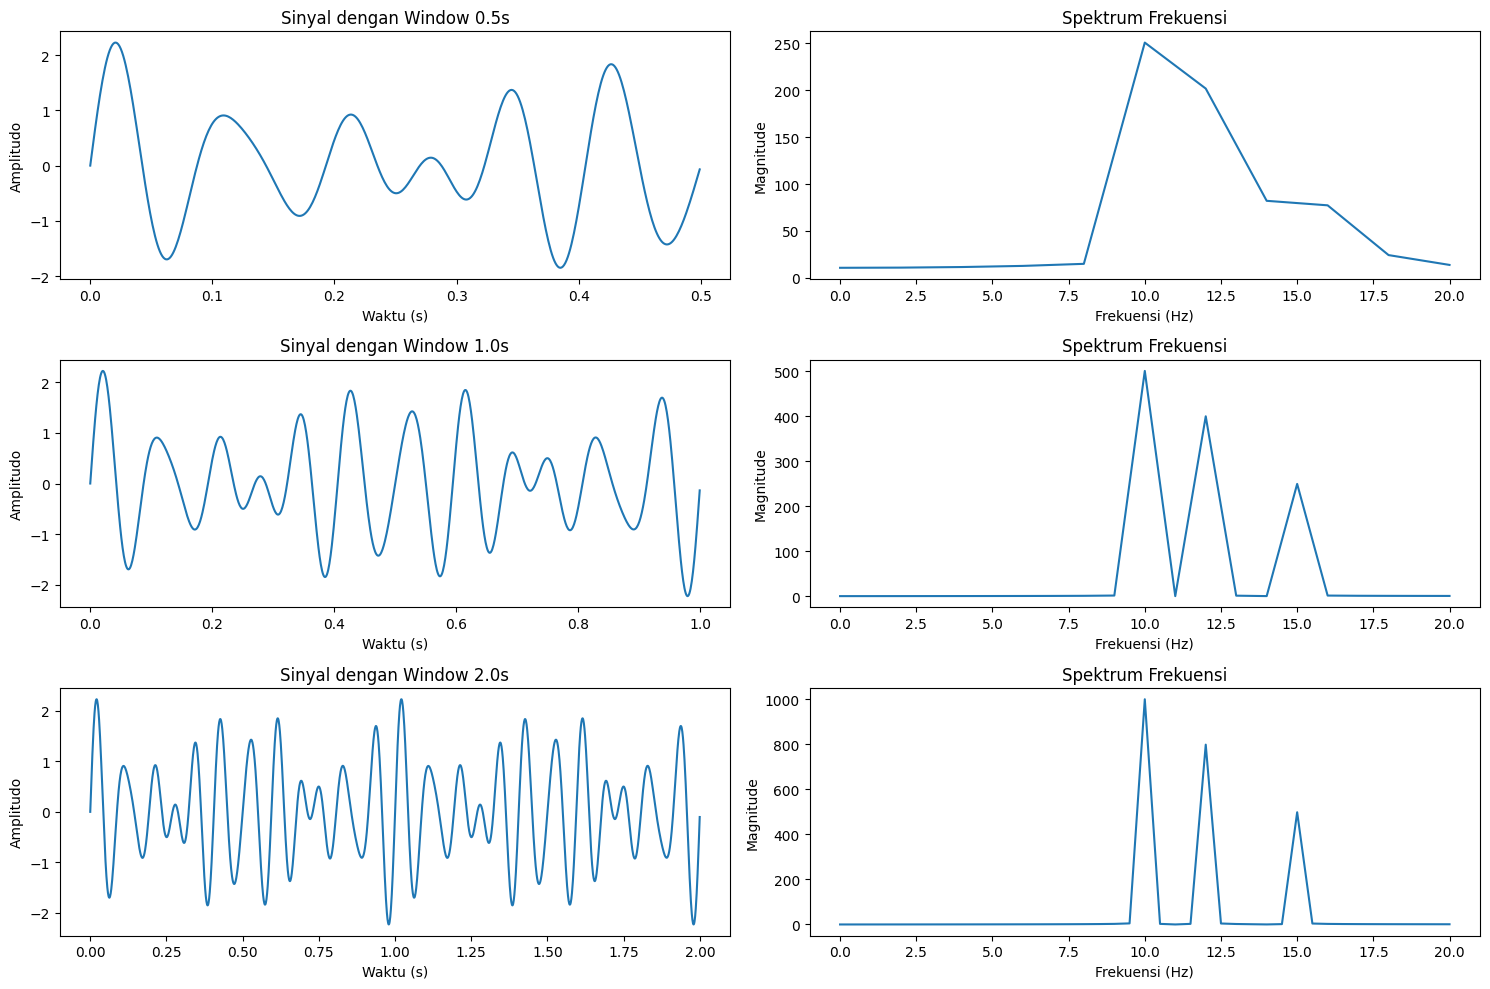

Window Size: 500 sampel (0.5 detik), Δf = 2.00 Hz
Window Size: 1000 sampel (1.0 detik), Δf = 1.00 Hz
Window Size: 2000 sampel (2.0 detik), Δf = 0.50 Hz


In [28]:
# Analisa panjang setiap window
window_sizes = [fs//2, fs, fs*2]

plt.figure(figsize=(15, 10))
for i, window_size in enumerate(window_sizes, 1):
    windowed_signal = signal[:window_size]
    t_window = t[:window_size]

    freq, fft_result = calculate_scipy_fft(windowed_signal, fs)

    plt.subplot(3, 2, 2*i-1)
    plt.plot(t_window, windowed_signal)
    plt.title(f'Sinyal dengan Window {window_size/fs}s')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')

    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 20)
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


#Menghitung frekuensi setiap window
for window_size in window_sizes:
    delta_f = fs / window_size
    print(f"Window Size: {window_size} sampel ({window_size/fs:.1f} detik), Δf = {delta_f:.2f} Hz")


##JAWABAN

1. Pengaruh Panjang Window:
  *   requency Resolution: Panjang window memengaruhi kemampuan untuk membedakan frekuensi yang berdekatan. Window pendek menghasilkan resolusi frekuensi yang rendah (Δ𝑓 besar), sehingga sulit untuk memisahkan frekuensi berdekatan, sedangkan window panjang memberikan resolusi frekuensi yang tinggi (Δ𝑓 kecil), memungkinkan identifikasi frekuensi dengan lebih jelas.
  *   Magnitude Spectrum: Window pendek menghasilkan spektrum dengan puncak yang lebih lebar dan kasar, yang menyebabkan kurangnya kejelasan dalam melihat frekuensi dominan. Sebaliknya, window panjang menghasilkan puncak spektrum yang tajam dan halus, sehingga frekuensi dominan dapat diidentifikasi dengan lebih akurat.

2. Window Size Optimal: Untuk mendeteksi ketiga frekuensi (10 Hz, 12 Hz, dan 15 Hz), window dengan ukuran fs × 2 (2000 sampel) adalah yang paling optimal. Dengan resolusi frekuensi yang tinggi, ketiga puncak pada frekuensi tersebut dapat terpisah dengan jelas tanpa saling tumpang tindih.

3. Frequency Resolution: Dengan sampling rate fs = 1000 Hz, resolusi frekuensi (Δ𝑓 = 𝑓𝑠/N) untuk setiap window size adalah: 𝑓𝑠 / 2 = 500 sampel menghasilkan , Δ𝑓 = 2.00 Hz, fs = 1000 menghasilkan Δ𝑓 = 1.00 Hz, dan fs×2=2000 sampel menghasilkan Δ𝑓 = 0.50 Hz. Semakin panjang window, semakin kecil Δ𝑓, sehingga resolusi frekuensi meningkat.

4. Trade-off Antara Frequency Resolution dan Time Resolution: Resolusi frekuensi tinggi (Δ𝑓) memerlukan window panjang, yang memberikan detail frekuensi yang baik tetapi mengorbankan resolusi waktu, sehingga sulit menangkap perubahan cepat dalam domain waktu. Sebaliknya, window pendek memberikan resolusi waktu tinggi, cocok untuk melacak perubahan cepat, tetapi resolusi frekuensinya menurun, sehingga frekuensi berdekatan sulit dibedakan. Trade-off ini bergantung pada kebutuhan analisis antara fokus pada frekuensi atau waktu.



##Analisis

Panjang window memiliki pengaruh signifikan pada resolusi frekuensi dan spektrum magnitudo. Window panjang memberikan resolusi frekuensi tinggi (\(\Delta f\) kecil) sehingga mampu membedakan frekuensi yang berdekatan dengan jelas dan menghasilkan puncak spektrum yang tajam. Sebaliknya, window pendek menghasilkan resolusi frekuensi rendah (\(\Delta f\) besar), membuat puncak spektrum lebih lebar dan kasar. Untuk mendeteksi frekuensi 10 Hz, 12 Hz, dan 15 Hz, window dengan ukuran \(fs \times 2\) (2000 sampel) adalah yang paling optimal karena memungkinkan identifikasi ketiga frekuensi tanpa tumpang tindih. Resolusi frekuensi (\(\Delta f\)) semakin kecil dengan panjang window yang lebih besar, tetapi ini mengorbankan resolusi waktu. Trade-off antara resolusi frekuensi dan waktu menjadi penting, di mana window panjang cocok untuk analisis spektrum, sedangkan window pendek lebih baik untuk melacak perubahan cepat dalam domain waktu.

#TUGAS 3

Mengapa nyquist_rate dihitung sebagai sampling_rate / 2? Dan mengapa frekuensi cutoff (low dan high) dibagi dengan nyquist_rate?

##Jawaban:
**Nyquist rate** dihitung sebagai **sampling rate / 2** karena teorema Nyquist-Shannon yang menyatakan bahwa untuk merepresentasikan sinyal analog secara akurat dalam domain digital, frekuensi sampling harus setidaknya dua kali lipat dari frekuensi tertinggi dalam sinyal tersebut. Frekuensi tertinggi yang dapat terdeteksi tanpa terjadinya **aliasing** adalah setengah dari frekuensi sampling, itulah mengapa **Nyquist rate** didefinisikan sebagai **sampling rate / 2**. Jika frekuensi sinyal melebihi Nyquist rate, sinyal akan terdistorsi dan mengalami aliasing, di mana komponen frekuensi tinggi disamarkan sebagai komponen frekuensi rendah.

Sedangkan untuk **frekuensi cutoff** (low dan high), kita membaginya dengan Nyquist rate karena Nyquist rate memberi batas atas frekuensi yang dapat diproses oleh sistem digital. Dengan membagi frekuensi cutoff dengan Nyquist rate, kita mengonversi frekuensi dari domain nyata (Hz) ke dalam domain yang relatif terhadap frekuensi sampling digital. Ini memastikan bahwa frekuensi cutoff berada dalam batas yang valid untuk sistem digital dan tidak menyebabkan aliasing, sehingga filter dapat berfungsi dengan baik dalam menganalisis sinyal pada frekuensi yang sesuai dengan kemampuan sistem sampling digital.

#TUGAS 4

Buatlah penjelasan tentang filter IIR:
1. Jelaskan apa itu IIR
2. Jelaskan bagaimana merancang filter IIR secara manual (tanpa menggunakan scipy.signal)
3. Lakukan eksperimen dengan membandingkan filter IIR yang dibuat secara manual Vs. menggunakan scipy.signal

##Jawaban:
1. Infinite Impulse Response atau IIR adalah jenis filter digital yang memiliki respons impuls yang tidak terbatas, artinya output filter dipengaruhi oleh masukan saat ini dan masukan sebelumnya, serta output sebelumnya. Dalam IIR, umumnya terdapat komponen recursive yang menyebabkan output terus dipengaruhi oleh masukan sebelumnya selama proses filtering. Oleh karena itu, filter IIR biasanya lebih efisien dalam hal kompleksitas dan membutuhkan lebih sedikit koefisien dibandingkan filter FIR (Finite Impulse Response).

  Ciri khas dari IIR adalah adanya feedback, yang memungkinkan filter memiliki respons impuls yang "tak terhingga". Filter IIR dapat digunakan untuk aplikasi-aplikasi seperti penghilangan noise, pemrosesan suara, dan pemrosesan sinyal audio atau video, karena efisiensinya dalam menggunakan sumber daya komputer.

2. Untuk merancang filter IIR secara manual, kita perlu menggunakan persamaan diferensial atau fungsi transfer yang mendeskripsikan filter tersebut. Fungsi transfer filter IIR dapat ditulis dalam bentuk rasio polinomial dari variabel z, yaitu:
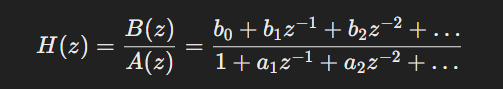

Dimana:
* 𝐵(𝑧) B(z) adalah polinomial pembilang, yang berisi koefisien b.
* 𝐴 (𝑧) adalah polinomial penyebut, yang berisi koefisien a.
* Koefisien b dan a dapat dihitung berdasarkan desain filter yang diinginkan, misalnya dengan menggunakan teknik seperti bilinear transform atau impulse invariance.

Langkah-langkah umum untuk merancang filter IIR secara manual:
1. Tentukan spesifikasi filter:
  Frekuensi cutoff, tipe filter (low-pass, high-pass, band-pass, atau band-stop), dan parameter lainnya.
2. Pilih tipe filter IIR:
  Seperti Butterworth, Chebyshev, atau Elliptic, berdasarkan karakteristik respons frekuensi yang diinginkan.
3. Gunakan transformasi bilinear:
  Jika spesifikasi filter dalam domain analog (misalnya, filter Butterworth atau Chebyshev), Anda dapat menggunakan transformasi bilinear untuk memetakan filter analog ke domain digital.
4. Hitung koefisien filter:
  Tentukan koefisien pembilang dan penyebut berdasarkan tipe dan spesifikasi filter yang telah dipilih.
5. Implementasi filter:
  Setelah koefisien dihitung, implementasikan filter tersebut dalam bentuk persamaan rekursif.



###3. Perbandingan filter IIR Manual dan Scipy

In [36]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

fs = 1000
f_c = 100
order = 4

nyquist = 0.5 * fs
normalized_cutoff = f_c / nyquist

In [37]:
# Desain filter low-pass Butterworth menggunakan scipy
b_scipy, a_scipy = signal.butter(order, normalized_cutoff, btype='low')

# Menampilkan koefisien pembilang (b) dan penyebut (a) dari scipy
print("Koefisien Pembilang (scipy):", b_scipy)
print("Koefisien Penyebut (scipy):", a_scipy)


Koefisien Pembilang (scipy): [0.00482434 0.01929737 0.02894606 0.01929737 0.00482434]
Koefisien Penyebut (scipy): [ 1.         -2.36951301  2.31398841 -1.05466541  0.18737949]


In [38]:
# Koefisien filter manual (misalnya, dihitung dengan metode Butterworth atau transformasi bilinear)
b_manual = [0.01058666, 0.04234665, 0.06352097, 0.04234665, 0.01058666]
a_manual = [1, -1.9555778, 1.81132976, -0.85281504, 0.24382235]

# Menampilkan koefisien untuk filter manual
print("\nKoefisien Pembilang (manual):", b_manual)
print("Koefisien Penyebut (manual):", a_manual)


Koefisien Pembilang (manual): [0.01058666, 0.04234665, 0.06352097, 0.04234665, 0.01058666]
Koefisien Penyebut (manual): [1, -1.9555778, 1.81132976, -0.85281504, 0.24382235]


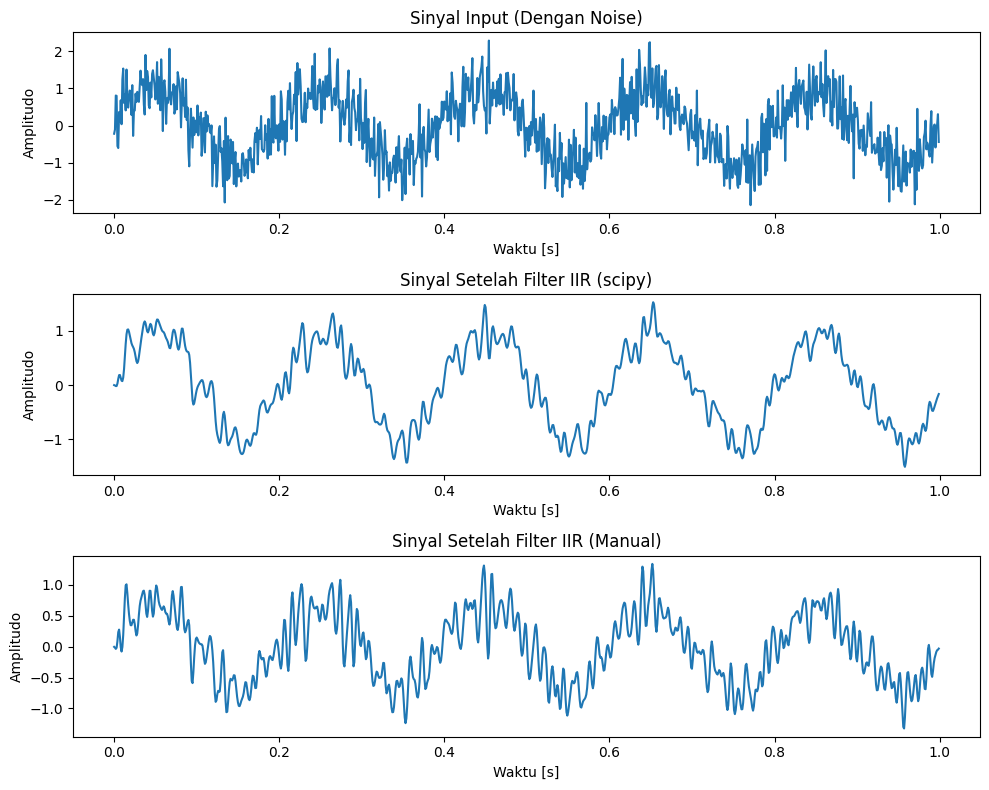

In [39]:
# Membuat sinyal input (sinyal dengan noise)
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# Terapkan filter menggunakan scipy
y_scipy = signal.lfilter(b_scipy, a_scipy, x)

# Terapkan filter manual
y_manual = signal.lfilter(b_manual, a_manual, x)

# Plot hasil
plt.figure(figsize=(10, 8))

# Plot sinyal input
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinyal Input (Dengan Noise)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

# Plot hasil filter menggunakan scipy
plt.subplot(3, 1, 2)
plt.plot(t, y_scipy)
plt.title('Sinyal Setelah Filter IIR (scipy)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

# Plot hasil filter manual
plt.subplot(3, 1, 3)
plt.plot(t, y_manual)
plt.title('Sinyal Setelah Filter IIR (Manual)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()

####Kedua pendekatan (manual dan menggunakan scipy.signal) seharusnya memberikan hasil yang sangat mirip. Hal ini menunjukkan bahwa penggunaan fungsi built-in sangat berguna karena efisiensi dan keakuratan dalam desain filter, namun pendekatan manual memberi fleksibilitas dalam hal kontrol penuh atas perhitungan dan pemahaman teoritis di balik desain filter.

#TUGAS 5
Jelaskan karakteristik dari filter FIR dan IIR. Apa kelebihan dan kekurangan dari masing-masing filter?

* Filter **FIR (Finite Impulse Response)** dan **IIR (Infinite Impulse Response)** memiliki karakteristik yang berbeda dalam hal desain dan aplikasinya. Filter **FIR** memiliki respons impuls terbatas, yang berarti outputnya hanya dipengaruhi oleh nilai masukan saat ini dan sebelumnya, tanpa adanya feedback dari output sebelumnya. Filter FIR selalu stabil dan dapat dirancang untuk memiliki fase linier, yang menjadikannya ideal untuk aplikasi yang membutuhkan distorsi fase minimal, seperti pemrosesan audio. Namun, untuk mencapai respons frekuensi yang tajam, filter FIR memerlukan ordo yang lebih tinggi, yang berarti memori dan waktu komputasi yang lebih besar.

  Di sisi lain, filter **IIR** memiliki respons impuls tak terbatas karena adanya feedback yang memungkinkan output dipengaruhi oleh masukan saat ini, sebelumnya, dan juga output sebelumnya. Filter IIR lebih efisien karena dapat mencapai karakteristik filter yang serupa dengan FIR tetapi menggunakan koefisien yang lebih sedikit, menjadikannya lebih hemat dalam penggunaan memori dan lebih cepat dalam komputasi. Namun, filter IIR bisa menjadi tidak stabil jika koefisien tidak dihitung dengan benar dan biasanya menghasilkan distorsi fase, yang bisa menjadi masalah dalam aplikasi yang sensitif terhadap fase. Filter IIR umumnya digunakan untuk aplikasi yang membutuhkan efisiensi tinggi dan dapat mentoleransi sedikit distorsi fase.

* Kelebihan Filter FIR:
  1. Stabilitas: Selalu stabil karena tidak ada feedback.
  2. Linear Phase: Dapat dirancang untuk memiliki fase linier, yang penting untuk aplikasi yang sensitif terhadap distorsi fase, seperti audio.
  3. Implementasi yang Sederhana: Hanya melibatkan koefisien pembilang, sehingga lebih mudah dipahami dan diterapkan.

* Kekurangan Filter FIR:
  1. Kompleksitas Tinggi: Memerlukan banyak koefisien untuk mencapai respons frekuensi yang tajam, yang meningkatkan penggunaan memori dan waktu komputasi.
  2. Lebih Lambat: Karena ordo yang lebih tinggi, filter FIR biasanya lebih lambat dibandingkan IIR untuk tujuan yang serupa.

* Kelebihan Filter IIR:
  1. Efisiensi: Menggunakan koefisien lebih sedikit dibandingkan FIR untuk mencapai karakteristik filter yang serupa, sehingga lebih hemat memori dan waktu komputasi.
  2. Kompleksitas Lebih Rendah: Dapat mencapai hasil yang efisien dengan ordo yang lebih rendah.

* Kekurangan Filter IIR:
  1. Instabilitas: Bisa menjadi tidak stabil jika koefisien tidak dihitung atau diimplementasikan dengan benar.
  2. Non-Linear Phase: Cenderung menghasilkan distorsi fase, yang bisa menjadi masalah dalam aplikasi yang membutuhkan distorsi fase minimal.



#TUGAS 6

Lakukan eksperimen berikut:
* Buatlah sinyal ECG (jika nim anda Ganjil) atau Respiration Signal (jika nim anda Genap) dengan library neurokit2
* Aturlah noise = 0.2 untuk ECG atau noise = 0.05 untuk Respiration Signal
* Gunakan NIM anda sebagai random seed
* Sampling rate dan durasi signal bebas
* Lakukan komparasi antara filter FIR dan IIR pada sinyal yang telah dibuat. Gunakan scipy.signal untuk filter FIR dan IIR agar lebih mudah.
* Lakukan cut off yang menurut anda paling baik untuk kedua filter tersebut dan jelaskan alasannya. (Pernah dibahas di kelas)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import neurokit2 as nk

# Set seed menggunakan NIM Anda
np.random.seed(121140186)
fs = 1000
sampling_rate = 500
duration = 10
resp_signal = nk.rsp_simulate(duration=duration, sampling_rate=sampling_rate, noise=0.05)


In [48]:
# 2. Parameter filter
cutoff = 2  # Frekuensi cut-off 2 Hz (karena sinyal pernapasan biasanya < 2 Hz)
nyquist_rate = sampling_rate / 2

# 2.a. FIR Filter
fir_order = 101  # Orde filter FIR
fir_coeff = firwin(fir_order, cutoff / nyquist_rate)  # FIR filter coefficient
filtered_fir = lfilter(fir_coeff, 1.0, resp_signal)  # FIR filter applied to the signal

# 2.b. IIR Filter
iir_order = 4  # Orde filter IIR
b, a = butter(iir_order, cutoff / nyquist_rate, btype='low')  # IIR Butterworth filter
filtered_iir = filtfilt(b, a, resp_signal)  # Zero-phase filtering

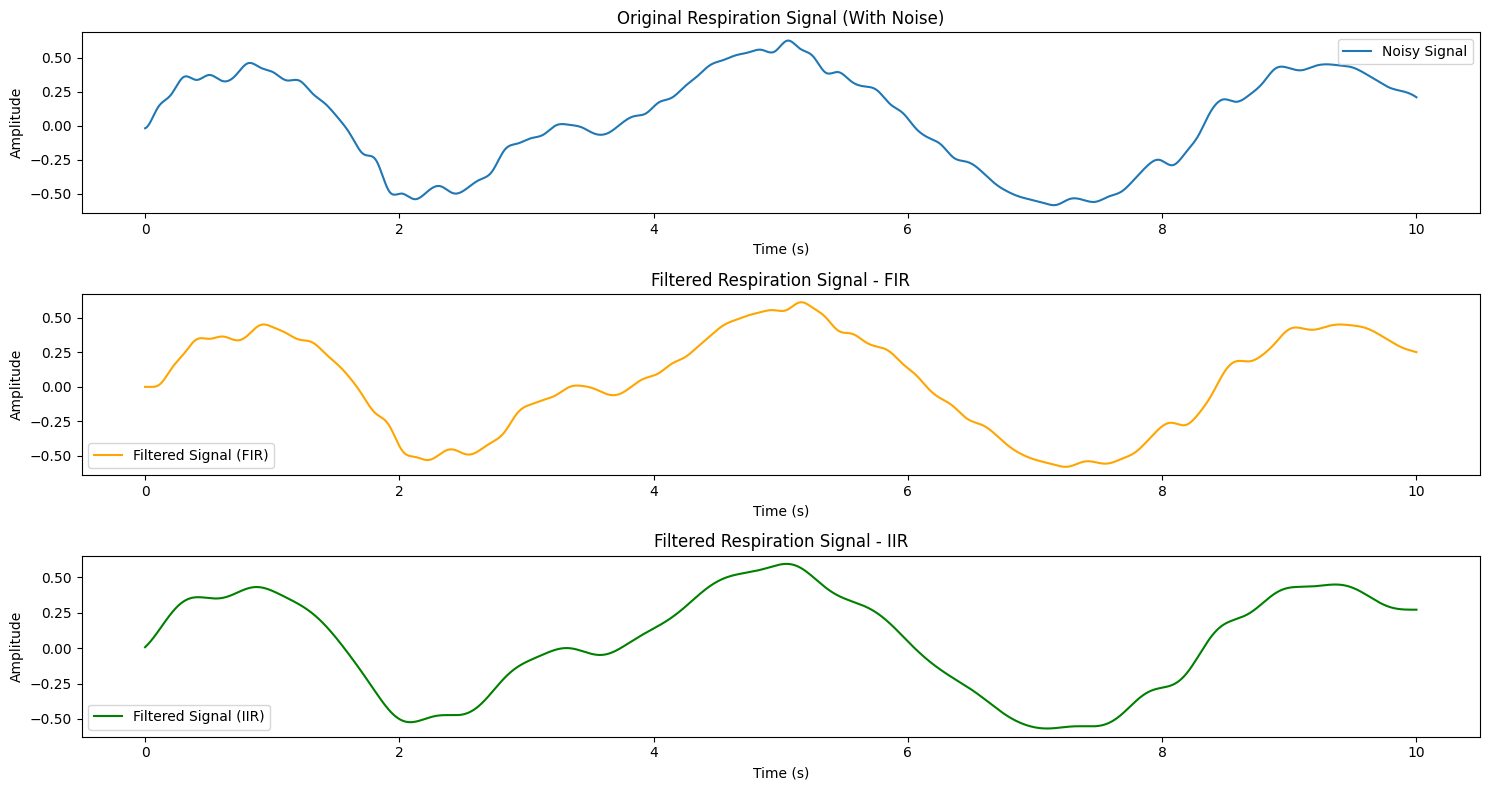

In [50]:
# 3. Plot original vs filtered signals
plt.figure(figsize=(15, 8))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, duration, len(resp_signal)), resp_signal, label="Noisy Signal")
plt.title("Original Respiration Signal (With Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot FIR filtered signal
plt.subplot(3, 1, 2)
plt.plot(np.linspace(0, duration, len(filtered_fir)), filtered_fir, label="Filtered Signal (FIR)", color='orange')
plt.title("Filtered Respiration Signal - FIR")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot IIR filtered signal
plt.subplot(3, 1, 3)
plt.plot(np.linspace(0, duration, len(filtered_iir)), filtered_iir, label="Filtered Signal (IIR)", color='green')
plt.title("Filtered Respiration Signal - IIR")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

##ANALISIS
Dalam eksperimen perbandingan dua jenis filter **FIR** dan **IIR**, dalam pemrosesan sinyal pernapasan yang terkontaminasi noise. Hasilnya filter **FIR** memberikan hasil yang lebih halus dan stabil, namun dengan kecepatan pemrosesan yang lebih lambat karena memerlukan lebih banyak koefisien dan sumber daya komputasi. Sementara itu, filter **IIR** lebih efisien dalam hal waktu dan memori, karena hanya membutuhkan sedikit koefisien untuk mencapai hasil serupa, meskipun dapat menimbulkan distorsi fase yang dapat diatasi dengan **zero-phase filtering**. Saya memilih **frekuensi cutoff 2 Hz** karena sinyal pernapasan manusia umumnya berada di bawah 1 Hz, dan cutoff ini efektif dalam menghilangkan noise tanpa mengurangi informasi penting dari sinyal pernapasan. Dengan demikian, meskipun **IIR** lebih efisien, saya lebih memilih **FIR** untuk aplikasi yang lebih mengutamakan kualitas sinyal dengan fase linier, sementara **IIR** cocok digunakan ketika efisiensi waktu dan memori lebih dibutuhkan.